# [CoE202] note 03b. Linear regression using gradient descent

- Class Date : 2021.03.18.
- Office Hour : -----------
- If you have any questions, upload on KLMS Q&A board, or ask directly at the TA office hours (Zoom)

## 1. Linear regression 
Given data points (x, y), we want to find linear estimator that fits well on the data. 

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

In [2]:
# data points
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]) 
y = np.array([0.0, 0.8, 1.9, 3.1, 4.8, 5.1])

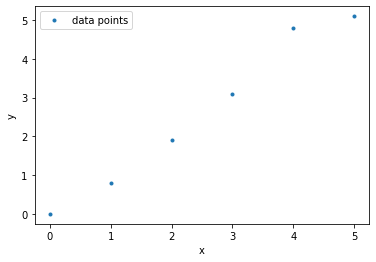

In [3]:
# plot data points
plt.plot(x, y, '.', label = 'data points')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

## 1-1. Linear regression with gradient descent


Let's first define a function that converts our data into the matrix form.

In [4]:
def linear_features(x, K):    
    # X: inputs of size N x 1
    # K: dimension of input data x
    # computes the feature matrix Phi (N x (K+1))    
    X = x.reshape(-1, K)  # 6 x K vector, N=6, D=K
    N, D = X.shape    
    X_aug = np.hstack([np.ones((N, 1)), X])  # augmented X of size 6 x (K+1)
    return X_aug

def vectorize_y(y)    :
    y_vec = y.reshape(-1, 1)  # 6 x 1 vector, N=6
    return y_vec

In [5]:
# convert our data into matrix form
X_aug = linear_features(x, 1)
y_vec = vectorize_y(y)

Below, we are going to define two functions.

np_linearfit: find the parameters using the closed form solution.

no_linearfit_gd: find the parameters using gradient desecnt.

In [14]:
# closed form linear fitting
def np_linearfit(X_aug, y):    
    # X: m x 2 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (2 x 1)
    
    theta = (np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T) @ y

    return theta

# linear fitting using gradient descent
def np_linearfit_gd(X_aug, y_vec):    
    # X: m x 2 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (2 x 1)
    
    # set the learning rate
    alpha =  0.01
    # set the number of iterations
    num_iter =  1000
    
    theta = np.zeros((2, 1))

    # iteratively apply gradient descent
    for i in range(num_iter):
        # calculate gradients
        grad_L = 0.5 * X_aug.T @ (X_aug @ theta - y_vec)

        # update theta
        theta = theta - alpha * grad_L
  
    return theta    

Let's try running np_linearfit_gd.
We can compare the results from np_linearfit and np_linearfit_gd.

In [15]:
# run fitting
p_coeff = np_linearfit_gd(X_aug, y_vec) # obtain p_coeff by using np_linearfit function
p = np.poly1d([p_coeff[1,0], p_coeff[0,0]]) # convert p_coeff to polynomial instance using np.poly1d function
print(p)

 
1.106 x - 0.1476


In [12]:
# run fitting
p_coeff = np_linearfit(X_aug, y_vec) # obtain p_coeff by using np_linearfit function
p = np.poly1d([p_coeff[1,0], p_coeff[0,0]]) # convert p_coeff to polynomial instance using np.poly1d function
print(p)

 
1.106 x - 0.1476


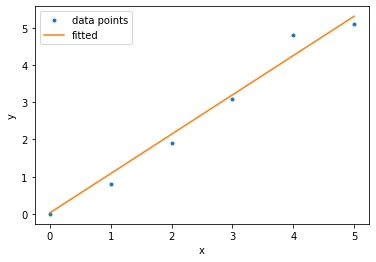

In [11]:
# plot results
xp = np.linspace(0, 5, 100) 
plt.plot(x, y, '.', label = 'data points') # plot data points
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')